In [2]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add("DecisionTree")
Pkg.add("ScikitLearn")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.t

In [3]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots
using DecisionTree
using ScikitLearn

In [4]:
df = CSV.read("national.csv")

,sitecode,sitename,sitetype
,String,String,String
1,XX,United States (XX),National
2,XX,United States (XX),National
3,XX,United States (XX),National
4,XX,United States (XX),National
5,XX,United States (XX),National
6,XX,United States (XX),National
7,XX,United States (XX),National
8,XX,United States (XX),National
9,XX,United States (XX),National


In [5]:
df = select!(df, Not(:sitename))
df = select!(df, Not(:sitetype))
df = select!(df, Not(:sitetypenum))
df = select!(df, Not(:survyear))
df = select!(df, Not(:weight))
df = select!(df, Not(:stratum))
df = select!(df, Not(:PSU))
df = select!(df, Not(:record))

,sitecode,year,age,sex,grade,race4,race7,stheight,stweight,bmi
,String,Int64,String,String,String,String,String,String,String,String
1,XX,1991,NA,NA,1,3,4,NA,NA,NA
2,XX,1991,NA,NA,NA,NA,NA,NA,NA,NA
3,XX,1991,4,NA,2,1,6,NA,NA,NA
4,XX,1991,5,NA,2,1,6,NA,NA,NA
5,XX,1991,6,NA,NA,4,NA,NA,NA,NA
6,XX,1991,NA,2,4,3,4,NA,NA,NA
7,XX,1991,NA,2,4,3,4,NA,NA,NA
8,XX,1991,1,2,NA,4,NA,NA,NA,NA
9,XX,1991,1,2,3,1,6,NA,NA,NA


In [6]:
keep = df[:age].!="NA"
r_df = df[keep, :]
keep = r_df[:grade].!="NA"
r_df = r_df[keep, :]
keep = r_df[:sex].!="NA"
r_df = r_df[keep, :]
keep = r_df[:q41].!=" "
r_df = r_df[keep, :]

,sitecode,year,age,sex,grade,race4,race7,stheight,stweight,bmi
,String,Int64,String,String,String,String,String,String,String,String
1,XX,1991,1,2,2,4,NA,NA,NA,NA
2,XX,1991,1,2,1,4,2,NA,NA,NA
3,XX,1991,1,2,2,3,4,NA,NA,NA
4,XX,1991,1,2,1,4,NA,NA,NA,NA
5,XX,1991,2,2,1,2,3,NA,NA,NA
6,XX,1991,2,2,1,1,6,NA,NA,NA
7,XX,1991,2,2,1,2,3,NA,NA,NA
8,XX,1991,3,2,1,3,4,NA,NA,NA
9,XX,1991,3,2,1,1,6,NA,NA,NA


In [7]:
r_df = r_df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(r_df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = r_df[:, :q41]
data = r_df[:, filter(col -> (col != :q41), names(r_df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:]

Size of dataset: 199642


39929×1 Array{String,2}:
 "1"
 "5"
 "1"
 "1"
 "1"
 "7"
 "1"
 "2"
 "1"
 "2"
 "3"
 "2"
 "2"
 ⋮
 "1"
 "2"
 "1"
 "1"
 "1"
 "1"
 "1"
 "5"
 "5"
 "3"
 "1"
 "6"

In [8]:
"This function converts strings to int values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_int(str)
    try
        parse(Int, str)
    catch
       0.0
    end
end

string_to_int

In [9]:
"This function converts strings to floating point values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end

string_to_float

In [10]:
function ages(df)
    for i = 1:size(df,1)
        if df[i, :age] == "1"
            df[i, :age] = "12"
        elseif df[i, :age] == "2"
            df[i, :age] = "13"
        elseif df[i, :age] == "3"
            df[i, :age] = "14"
        elseif df[i, :age] == "4"
            df[i, :age] = "15"
        elseif df[i, :age] == "5"
            df[i, :age] = "16"
        elseif df[i, :age] == "6"
            df[i, :age] = "17"           
        elseif df[i, :age] == "7"
            df[i, :age] = "18"
        end
    end
    df[:age] = string_to_int.(df[:age])
    return df
end

ages (generic function with 1 method)

In [11]:
train_x1 = ages(train_x)
test_x1 = ages(test_x)
val_x1 = ages(val_x)

,sitecode,year,age,sex,grade,race4,race7,stheight,stweight,bmi
,String,Int64,Int64,String,String,String,String,String,String,String
1,XX,1997,16,2,2,4,1,NA,NA,NA
2,XX,2001,17,1,4,3,4,1.63,65.77,24.7544
3,XX,2013,16,2,3,1,6,1.83,83.92,25.059
4,XX,2019,16,2,2,1,6,1.6,48.08,18.7813
5,XX,2019,15,2,2,2,3,1.65,59.88,21.9945
6,XX,1999,17,2,3,1,6,1.75,63.5,20.7347
7,XX,2015,16,2,2,3,4,1.75,70.31,22.9584
8,XX,1999,17,1,3,1,6,1.45,56.7,26.9679
9,XX,2007,16,1,2,1,6,1.63,58.97,22.195


In [12]:
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), length(cats))
    for i = 1:length(column)
        for j = 1:length(cats)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

onehot (generic function with 2 methods)

In [13]:
function ordinal(column, cats)
    result = zeros(size(column, 1), length(cats)-1)
    for i = 1:length(column)
        for j = 1:length(cats)
            if column[i] == cats[j]
                for k = 1:j-1
                    result[i,k] = 1
                end
            end
        end
    end
    result
end

ordinal (generic function with 1 method)

In [14]:
val_x1[:sex]

39928-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "2"
 "1"
 "2"
 "2"
 "2"
 "2"
 "2"
 "1"
 "1"
 "2"
 "2"
 "2"
 "2"
 ⋮
 "1"
 "1"
 "2"
 "1"
 "2"
 "2"
 "2"
 "1"
 "2"
 "1"
 "1"
 "2"

In [15]:
Xtrain = hcat(train_x1[:age], ones(ntrain))
Xval = hcat(val_x1[:age], ones(nval))
Xtrain = hcat(train_x1[:year], Xtrain)
Xval = hcat(val_x1[:year], Xval)
Xtrain = hcat(onehot(train_x1[:sex], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:sex], ["1", "2"]), Xval)
Xtrain = hcat(onehot(train_x1[:q23], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q23], ["1", "2"]), Xval)
Xtrain = hcat(onehot(train_x1[:q24], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q24], ["1", "2"]), Xval)
Xtrain = hcat(onehot(train_x1[:q30], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q30], ["1", "2"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q32], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q32], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q33], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q33], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(onehot(train_x1[:q34], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q34], ["1", "2"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q35], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q35], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q45], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q45], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q31], ["1", "2", "3", "4", "5", "6"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q31], ["1", "2", "3", "4", "5", "6"]), Xval)
Xtrain = hcat(onehot(train_x1[:q58], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q58], ["1", "2"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q71], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q71], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q75], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q75], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q77], ["1", "2", "3", "4", "5", "6", "7", "8"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q77], ["1", "2", "3", "4", "5", "6", "7", "8"]), Xval)
Xtrain = hcat(ordinal(train_x1[:q88], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(ordinal(val_x1[:q88], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(onehot(train_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(onehot(val_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
Xtrain = hcat(onehot(train_x1[:sexid], ["1", "2", "3", "4"]), Xtrain)
Xval = hcat(onehot(val_x1[:sexid], ["1", "2", "3", "4"]), Xval)
Xtrain = hcat(onehot(train_x1[:q25], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q25], ["1", "2"]), Xval)

39928×94 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  1997.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  1.0  0.0  2001.0  17.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  1.0  2013.0  16.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  2019.0  16.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0     1.0  0.0  1.0  2019.0  15.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  1999.0  17.0  1.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0     1.0  0.0  1.0  2015.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1999.0  17.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2007.0  16.0  1.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  1.0  2015.0  17.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2005.0  17.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [16]:
?RandomForestClassifer

search: RandomForestClassifier

Couldn't find RandomForestClassifer
Perhaps you meant RandomForestClassifier or RandomForestRegressor


No documentation found.

Binding `RandomForestClassifer` does not exist.


In [17]:
clf = RandomForestClassifier()

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [18]:
fit!(clf, Xtrain, train_y[:,1])

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["1", "2", "3", "4", "5", "6", "7"]
ensemble:            Ensemble of Decision Trees
Trees:      10
Avg Leaves: 27432.9
Avg Depth:  38.9

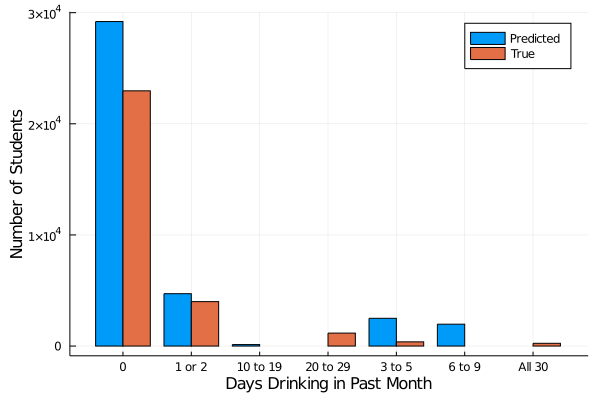

In [198]:
val_pred = predict(clf, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "1 or 2", "3 to 5", "6 to 9", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [203]:
accuracy = CrossValidation.cross_val_score(clf, Xtrain, train_y[:,1], cv=5)

5-element Array{Float64,1}:
 0.5758106923751095
 0.572728411035519
 0.5720070128569044
 0.5698601544562721
 0.5711780913417384

In [208]:
clf2 = RandomForestClassifier(n_trees = 50, n_subfeatures= 10)

RandomForestClassifier
n_trees:             50
n_subfeatures:       10
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [209]:
fit!(clf2, Xtrain, train_y[:,1])

RandomForestClassifier
n_trees:             50
n_subfeatures:       10
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["1", "2", "3", "4", "5", "6", "7"]
ensemble:            Ensemble of Decision Trees
Trees:      50
Avg Leaves: 27432.22
Avg Depth:  38.06

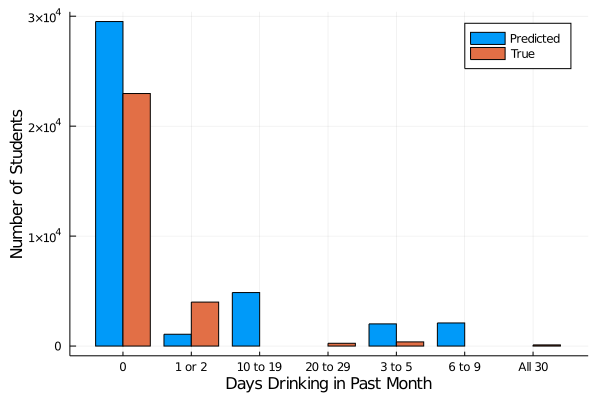

In [210]:
val_pred = predict(clf2, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "1 or 2", "3 to 5", "6 to 9", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [211]:
accuracy = CrossValidation.cross_val_score(clf2, Xtrain, train_y[:,1], cv=5)

5-element Array{Float64,1}:
 0.581653520303827
 0.5795316999874786
 0.5780597762564702
 0.5790022959716135
 0.5809050680470903

In [212]:
clf3 = RandomForestClassifier(n_trees = 5, n_subfeatures= 45)

RandomForestClassifier
n_trees:             5
n_subfeatures:       45
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [213]:
fit!(clf3, Xtrain, train_y[:,1])

RandomForestClassifier
n_trees:             5
n_subfeatures:       45
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["1", "2", "3", "4", "5", "6", "7"]
ensemble:            Ensemble of Decision Trees
Trees:      5
Avg Leaves: 22983.8
Avg Depth:  36.2

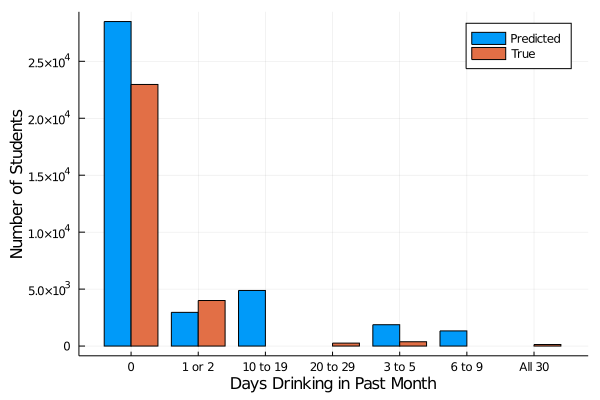

In [222]:
val_pred = predict(clf3, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in u]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "1 or 2", "3 to 5", "6 to 9", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [215]:
accuracy = CrossValidation.cross_val_score(clf3, Xtrain, train_y[:,1], cv=5)

5-element Array{Float64,1}:
 0.562914736446726
 0.5598313786051171
 0.5568542327600601
 0.5617616364015863
 0.5639559155047174

In [219]:
for trees = 5:20:100
    for subfeatures = 2:20:45
        clf = RandomForestClassifier(n_trees = trees, n_subfeatures= subfeatures)
        fit!(clf, Xtrain, train_y[:,1])
        println("trees: ", trees)
        println("subfeatures: ", subfeatures)
        accuracy = CrossValidation.cross_val_score(clf3, Xtrain, train_y[:,1], cv=5)
        println(sum(accuracy)/5)
    end
end

trees: 5
subfeatures: 2
0.5606126976702878
trees: 5
subfeatures: 22
0.5579998617567183
trees: 5
subfeatures: 42
0.5615227223300043
trees: 25
subfeatures: 2
0.562073618573969
trees: 25
subfeatures: 22
0.5601701939916486
trees: 25
subfeatures: 42
0.5606461256735014
trees: 45
subfeatures: 2
0.5606127687423291
trees: 45
subfeatures: 22
0.5601786921189083
trees: 45
subfeatures: 42
0.5609549580647986
trees: 65
subfeatures: 2
0.5601119402930383
trees: 65
subfeatures: 22
0.560470776709866
trees: 65
subfeatures: 42
0.5592518049949066
trees: 85
subfeatures: 2
0.5602789078408298
trees: 85
subfeatures: 22
0.5605458311914109
trees: 85
subfeatures: 42
0.559669381563067


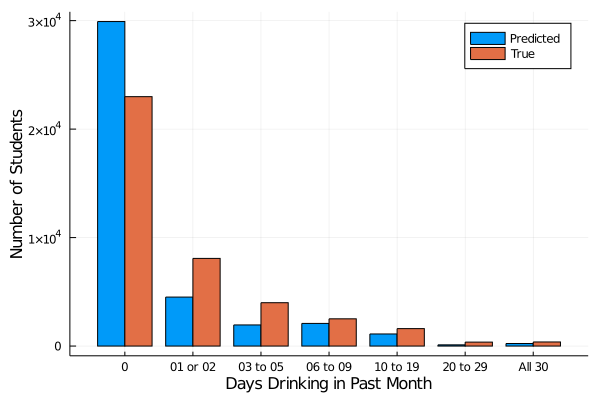

In [47]:
clfbest = RandomForestClassifier(n_trees = 25, n_subfeatures= 2)
fit!(clfbest, Xtrain, train_y[:,1])
val_pred = predict(clfbest, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in["1","2","3","4","5","6","7"]]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in ["1","2","3","4","5","6","7"]]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [64]:
true_pred = zeros(7)
false_pred = zeros(7)
for i in val_y
    for j in val_pred
        if i == j
            if i == "1"
                true_pred[1] += 1
            end
            if i == "2"
                true_pred[2]+= 1
            end
            if i == "3"
                true_pred[3]+= 1
            end
            if i == "4"
                true_pred[4] += 1
            end
            if i == "5"
                true_pred[5] += 1
            end
            if i == "6"
                true_pred[6] += 1
            end
            if i == "7"
                true_pred[7] += 1
            end
        else
            if j == "1"
                false_pred[1] += 1
            end
            if j == "2"
                false_pred[2]+= 1
            end
            if j == "3"
                false_pred[3] += 1
            end
            if j == "4"
                false_pred[4] += 1
            end
            if j == "5"
                false_pred[5] += 1
            end
            if j == "6"
                false_pred[6] += 1
            end
            if j == "7"
                false_pred[7] += 1    
            end
        end
    end
end

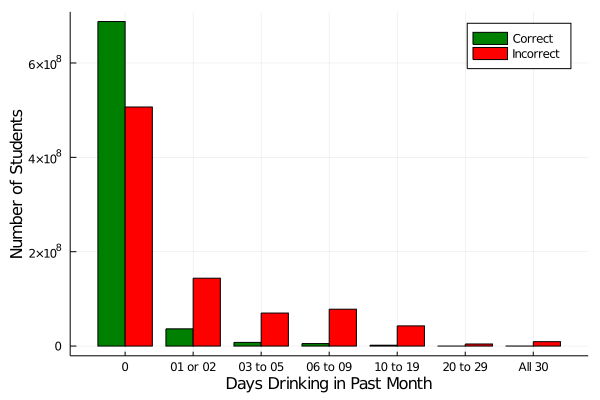

In [65]:
all = vcat(true_pred,false_pred)
all = reshape(all, (14, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [66]:
sum(true_pred)/sum(all)

0.46369131826086796

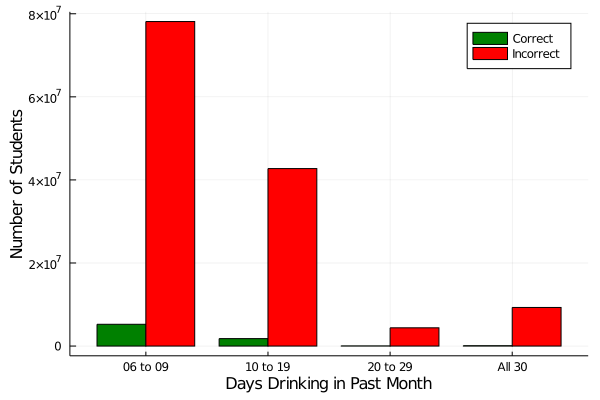

In [67]:
all = vcat(true_pred[4:end],false_pred[4:end])
all = reshape(all, (8, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 4)
group = repeat(["06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

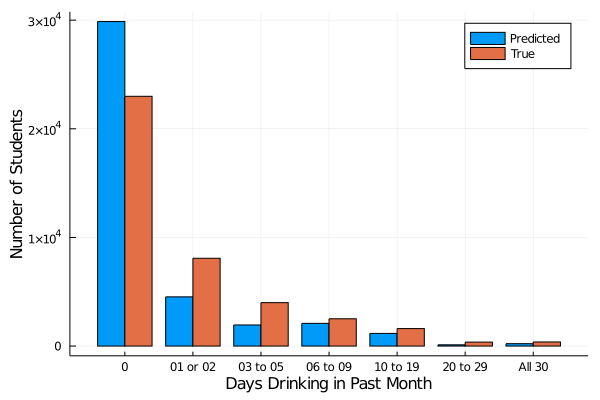

In [68]:
clfbest = RandomForestClassifier(n_trees = 25, n_subfeatures= 2)
fit!(clfbest, Xtrain, train_y[:,1])
val_pred = predict(clfbest, Xval)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in["1","2","3","4","5","6","7"]]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in ["1","2","3","4","5","6","7"]]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [74]:
Xtest = hcat(test_x1[:age], ones(nval + 1))
Xtest = hcat(test_x1[:year], Xtest)
Xtest = hcat(onehot(test_x1[:sex], ["1", "2"]), Xtest)
Xtest = hcat(onehot(test_x1[:q23], ["1", "2"]), Xtest)
Xtest = hcat(onehot(test_x1[:q24], ["1", "2"]), Xtest)
Xtest = hcat(onehot(test_x1[:q30], ["1", "2"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q32], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q33], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(onehot(test_x1[:q34], ["1", "2"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q35], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q45], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q31], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q31], ["1", "2", "3", "4", "5", "6"]), Xtest)
Xtest = hcat(onehot(test_x1[:q58], ["1", "2"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q71], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q75], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q77], ["1", "2", "3", "4", "5", "6", "7", "8"]), Xtest)
Xtest = hcat(ordinal(test_x1[:q88], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(onehot(test_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xtest)
Xtest = hcat(onehot(test_x1[:sexid], ["1", "2", "3", "4"]), Xtest)
Xtest = hcat(onehot(test_x1[:q25], ["1", "2"]), Xtest)

39929×94 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1997.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1997.0  17.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1999.0  18.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  1.0  0.0  2003.0  18.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  1.0  0.0  1.0  2015.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2001.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1991.0  15.0  1.0
 0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  1.0  0.0  2017.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  1995.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2011.0  17.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  

In [73]:
size(test_x1)

(39929, 303)

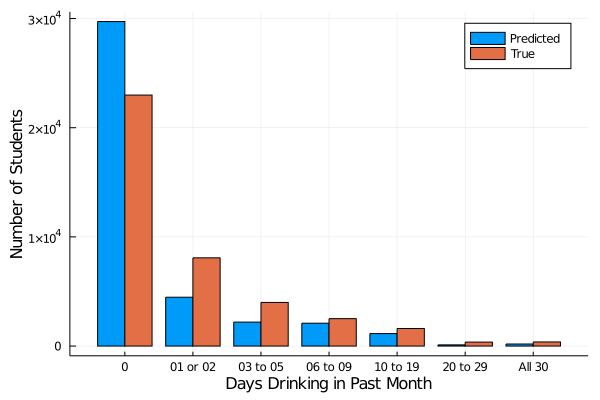

In [75]:
clfbest = RandomForestClassifier(n_trees = 25, n_subfeatures= 2)
fit!(clfbest, Xtrain, train_y[:,1])
val_pred = predict(clfbest, Xtest)

u=unique(val_pred)
pred_counts=[(count(x->x==i,val_pred)) for i in["1","2","3","4","5","6","7"]]

u=unique(val_y)
y_counts=[(count(x->x==i,val_y)) for i in ["1","2","3","4","5","6","7"]]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [79]:
true_pred = zeros(7)
false_pred = zeros(7)
for i in test_y
    for j in val_pred
        if i == j
            if i == "1"
                true_pred[1] += 1
            end
            if i == "2"
                true_pred[2]+= 1
            end
            if i == "3"
                true_pred[3]+= 1
            end
            if i == "4"
                true_pred[4] += 1
            end
            if i == "5"
                true_pred[5] += 1
            end
            if i == "6"
                true_pred[6] += 1
            end
            if i == "7"
                true_pred[7] += 1
            end
        else
            if j == "1"
                false_pred[1] += 1
            end
            if j == "2"
                false_pred[2]+= 1
            end
            if j == "3"
                false_pred[3] += 1
            end
            if j == "4"
                false_pred[4] += 1
            end
            if j == "5"
                false_pred[5] += 1
            end
            if j == "6"
                false_pred[6] += 1
            end
            if j == "7"
                false_pred[7] += 1    
            end
        end
    end
end

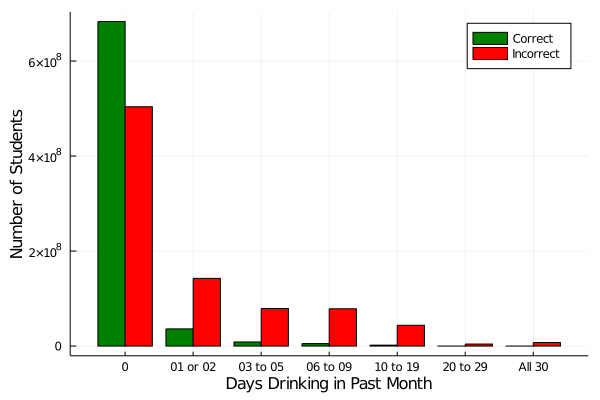

In [80]:
all = vcat(true_pred,false_pred)
all = reshape(all, (14, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [81]:
sum(true_pred)/sum(all)

0.4611389271906945

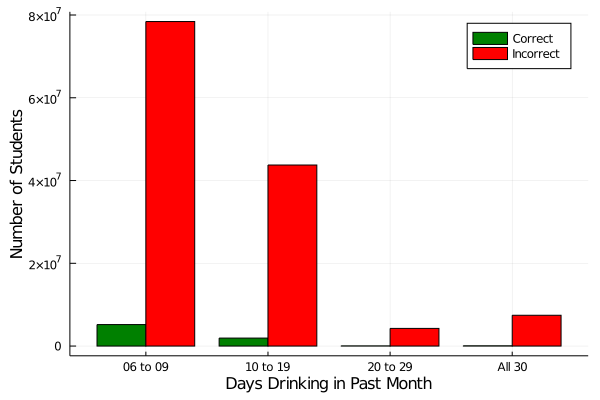

In [82]:
all = vcat(true_pred[4:end],false_pred[4:end])
all = reshape(all, (8, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 4)
group = repeat(["06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [84]:
true_pred

7-element Array{Float64,1}:
     6.83162932e8
     3.6154394e7
     8.659275e6
     5.191026e6
     1.928784e6
 44820.0
 64108.0

In [85]:
true_pred[7]/(true_pred[7]+false_pred[7])

0.008540158781837762

In [86]:
true_pred[6]/(true_pred[6]+false_pred[6])

0.010393448370858274

In [87]:
(true_pred[6] + true_pred[7])/(true_pred[6]+false_pred[6]+true_pred[7]+false_pred[7])

0.009216359037291191